<a href="https://colab.research.google.com/github/gregorimaia/Engenharia_Aeroespacial/blob/main/Resposta_em_frequencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install control
from numpy import exp, sin, cos, rad2deg, logspace, sqrt, exp
from control.matlab import *
from matplotlib import pyplot as plt

     |████████████████████████████████| 339 kB 4.1 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=6682e7b87250a16fe60dfc63b33fb56aa8a0cd181d5d48654834ba5cc514c77c
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


# Resposta em frequência de sistemas dinâmicos

Prof. Dr. Lucas Vizzotto Bellinaso<br>
29 de dezembro de 2020 <br>
Sistemas de Controle 1 - Engenharia Aeroespacial <br>
Universidade Federal de Santa Maria


## Diagrama de Bode

O diagrama de Bode é um gráfico que representa a resposta em frequência de um sistema dinâmico em magnitude (em dB) em fase.  A frequência é representada em escala logarítmica.  A magnitude é o ganho da entrada para a saída na dada frequência.  <br>
A resposta em frequência de um sistema dinâmico modelado em função de transferência é obtida através da substituição de $s$ por $j\omega$, e convertendo a função de transferência para a forma polar.

$$G(j\omega) = \left|G(\omega)\right|e^{j\phi(\omega)}=\left|G(\omega)\right|\angle{\phi(\omega)} $$

onde:<br>
$\left|G(\omega)\right|$: ganho absoluto da entrada para a saída na frequência $\omega$.<br>
$\left|\phi(\omega)\right|$: diferença de fase da entrada para a saída na frequência $\omega$.<br>


No Diagrama de Bode, o ganho $\left|G\right|$ é representado em escala logarítmica através da conversão para decibéis (dB). Para converter ganho real em magnitude em dB utiliza-se a equação:

$$G_{dB} = 20 \log_{10}\left|G\right| $$


Para conversão de magnitude em dB para ganho real, utiliza-se a equação:

$$\left|G\right| = 10^{\frac{G_{dB}}{20}} $$

Na biblioteca de Controle em Python, podem-se utilizar as seguintes funções para conversão:
```python
from control.matlab import *
G = tf(1,[1,1])
Ganho, phase, omega = bode(G);          #plotagem do diagrama de Bode
Gdb = mag2db(Ganho)                     #conversão de ganho real para dB
Ganho = db2mag(Gdb)                     #conversão de ganho em dB para real
```





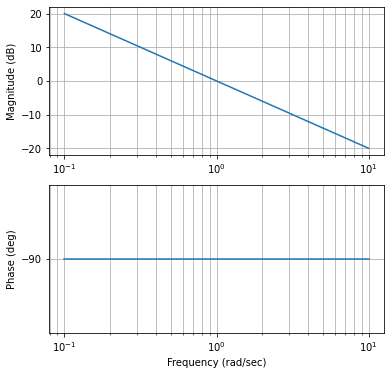

In [ ]:
#Resposta em frequência de um integrador
Gintegrador = tf(1,[1,0])
plt.figure(figsize=(6,6))
bode(Gintegrador, Hz=False);  #plot do diagrama de Bode com frequência em Radianos


Warning (matlab.bode): plot styles not implemented


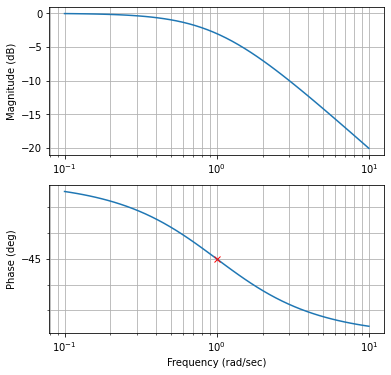

In [ ]:
#sistema de primeira ordem - polo real

wp = 1;    #Frequência do polo, em rad/s

G = tf(1,[1/wp,1])
plt.figure(figsize=(6,6))
bode(G, Hz=False);          #plotagem do diagrama de Bode
mag,phase,omega=bode(G,'rx', [wp], plot=False, deg=True);  #posição do polo
plt.plot(wp,rad2deg(phase),'rx');


Warning (matlab.bode): plot styles not implemented


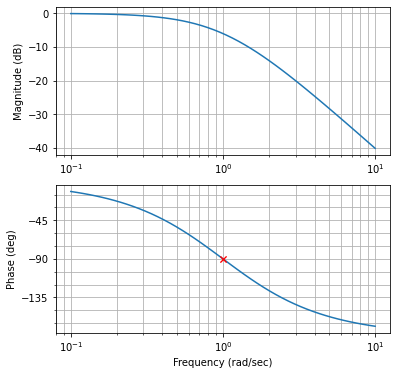

In [ ]:
#sistema de segunda ordem - dois polos reais

wp1 = 1;    #Frequência do 1° polo, em rad/s
wp2 = 1;    #Frequência do 2° polo, em rad/s

G = tf(1,[1/wp1,1])*tf(1,[1/wp2,1])
plt.figure(figsize=(6,6))
bode(G, Hz=False);          #plotagem do diagrama de Bode
mag,phase,omega=bode(G,'rx', [wp1, wp2], plot=False, deg=True);  #posição do polo
plt.plot([wp1, wp2],rad2deg(phase),'rx');

Warning (matlab.bode): plot styles not implemented

Valores de pico e frequência:
csi = 0.05	 pico = 20.01 dB 	wd = 1.00 rad/s
csi = 0.15	 pico = 10.56 dB 	wd = 0.99 rad/s
csi = 0.5	 pico = 1.25 dB 	wd = 0.87 rad/s


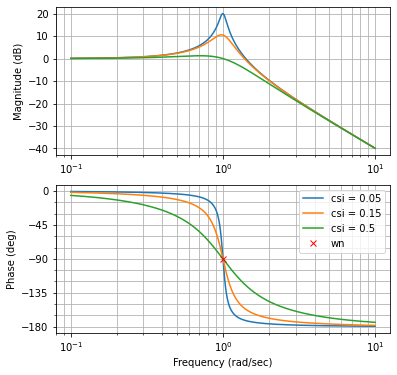

In [ ]:
# Sistema com polos complexos conjugados

wn = 1     #frequência natural, em rad/s
csi1 = 0.05  #coeficiente de amortecimento
csi2 = 0.15  #coeficiente de amortecimento
csi3 = 0.50  #coeficiente de amortecimento

G1 = tf(wn**2,[1, 2*csi1*wn, wn**2])
G2 = tf(wn**2,[1, 2*csi2*wn, wn**2])
G3 = tf(wn**2,[1, 2*csi3*wn, wn**2])

plt.figure(figsize=(6,6))
omega = wn*logspace(-1,1,1000)    #pontos de plotagem (aumentando número de pontos)
bode(G1, G2, G3, omega, Hz=False);          #plotagem do diagrama de Bode
mag,phase,omega=bode(G1,'rx', [wn], plot=False, deg=True);  #posição do polo
plt.plot([wn],rad2deg(phase),'rx');
plt.legend((f'csi = {csi1}',f'csi = {csi2}',f'csi = {csi3}', 'wn'))

valor_pico = lambda csi: 1/(2*csi*sqrt(1-csi**2))  #função do valor de pico
omega_d = lambda csi, wn: wn*sqrt(1-csi**2)        #função do valor da frequência do pico
print('\nValores de pico e frequência:')
for csi in [csi1,csi2,csi3]:
  print(f'csi = {csi}\t pico = {mag2db(valor_pico(csi)):.2f} dB \twd = {omega_d(csi,wn):.2f} rad/s')


s
-
1



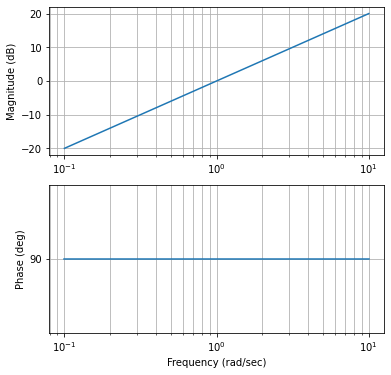

In [ ]:
#Resposta em frequência de um derivador
Gderivador = tf([1,0],1)
print(Gderivador)
plt.figure(figsize=(6,6))
bode(Gderivador, Hz=False);  #plot do diagrama de Bode com frequência em Radianos


s + 1
-----
  1

Warning (matlab.bode): plot styles not implemented


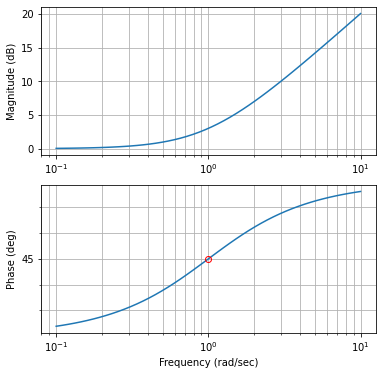

In [ ]:
#Resposta em freqência de um zero real

wz = 1;    #Frequência do zero, em rad/s

G = tf([1/wz,1],1)
print(G)
plt.figure(figsize=(6,6))
bode(G, Hz=False);          #plotagem do diagrama de Bode
mag,phase,omega=bode(G,'or', [wz], plot=False, deg=True);  #posição do polo
plt.plot(wz,rad2deg(phase),'or', fillstyle='none');


Warning (matlab.bode): plot styles not implemented


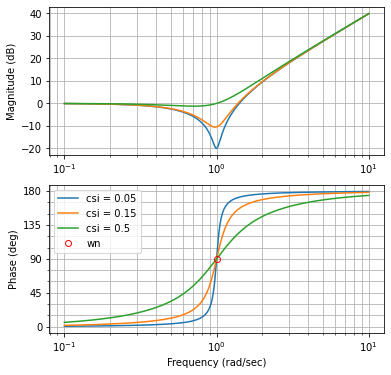

In [ ]:
# Zeros complexos conjugados

# Sistema com polos complexos conjugados

wn = 1     #frequência natural, em rad/s
csi1 = 0.05  #coeficiente de amortecimento
csi2 = 0.15  #coeficiente de amortecimento
csi3 = 0.50  #coeficiente de amortecimento

G1 = tf([1, 2*csi1*wn, wn**2],wn**2)
G2 = tf([1, 2*csi2*wn, wn**2],wn**2)
G3 = tf([1, 2*csi3*wn, wn**2],wn**2)

plt.figure(figsize=(6,6))
omega = wn*logspace(-1,1,1000)    #pontos de plotagem (aumentando número de pontos)
bode(G1, G2, G3, omega, Hz=False);          #plotagem do diagrama de Bode
mag,phase,omega=bode(G1,'or', [wn], plot=False, deg=True);  #posição do polo
plt.plot([wn],rad2deg(phase),'or', fillstyle='none');
plt.legend((f'csi = {csi1}',f'csi = {csi2}',f'csi = {csi3}', 'wn'))


0.1 s + 1
---------
  s + 1

Warning (matlab.bode): plot styles not implemented
Warning (matlab.bode): plot styles not implemented


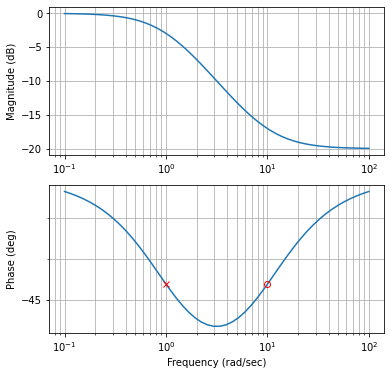

In [ ]:
# Testar soma de efeitos: 1 polo real e 1 zero real

wz = 10;    #Frequência do zero, em rad/s
wp = 1;    #Frequência do polo, em rad/s


G = tf([1/wz,1],[1/wp, 1])
print(G)
plt.figure(figsize=(6,6))
bode(G, Hz=False);          #plotagem do diagrama de Bode
mag,phase,omega=bode(G,'xr', [wp], plot=False, deg=True);  #posição do polo
plt.plot(wp,rad2deg(phase),'xr', fillstyle='none');
mag,phase,omega=bode(G,'or', [wz], plot=False, deg=True);  #posição do polo
plt.plot(wz,rad2deg(phase),'or', fillstyle='none');